<div style="background-color: #163eff; padding: 15px; text-align: center; display: flex; align-items: center; height: 100vh;">
    <span style="font-size: 35px; font-weight: bold; font-family: 'Times New Roman'; color: white; margin: auto;">
        import
    </span>
</div>

In [9]:
import os
import librosa
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import roc_curve, auc

<div style="background-color: #163eff; padding: 15px; text-align: center; display: flex; align-items: center; height: 100vh;">
    <span style="font-size: 35px; font-weight: bold; font-family: 'Times New Roman'; color: white; margin: auto;">
        Input Audio
    </span>
</div>

In [10]:
directory_path = "D:\Project\Joki\KNN-MFCC-REV\Audio"

<div style="background-color: #163eff; padding: 15px; text-align: center; display: flex; align-items: center; height: 100vh;">
    <span style="font-size: 35px; font-weight: bold; font-family: 'Times New Roman'; color: white; margin: auto;">
        Membaca semua audio berformat wav
    </span>
</div>

In [11]:
all_files = os.listdir(directory_path)
wav_files = [file for file in all_files if file.endswith(".wav")]

In [12]:
features = []
labels = []

In [13]:
for wav_file in wav_files:
    file_path = os.path.join(directory_path, wav_file)
    audio_data, sample_rate = librosa.load(file_path)

    mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=20)
    mfccs_mean = np.mean(mfccs, axis=1)

    if "1lhong" in wav_file:
        labels.append("1 lhong")
    elif "2lhong" in wav_file:
        labels.append("2 lhong")
    elif "1pasi teube" in wav_file:
        labels.append("1 pasi teube")
    elif "2pasi teube" in wav_file:
        labels.append("2 pasi teube")
        
    features.append(mfccs_mean)

In [14]:
features = np.array(features)
labels = np.array(labels)

In [15]:
df = pd.DataFrame(features, columns=[f"mfcc_{i}" for i in range(features.shape[1])])
df.insert(0, "label", labels)

In [19]:
df

,label,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19
0,1 lhong,-246.405869,117.416336,-51.145554,52.655880,-22.137150,-15.310780,-22.647781,-7.486814,-2.936989,...,-2.892957,-3.077223,-8.963640,-2.977826,5.020565,-20.798071,7.060617,-7.718058,-12.406495,4.519414
1,1 lhong,-264.492828,127.126205,-8.169453,49.621807,-20.739820,-8.671712,-28.406649,-8.877991,-7.518525,...,1.398180,-16.719711,-3.840970,-6.774444,-0.355224,-12.297637,0.714637,-4.450565,-5.269557,4.579228
2,1 lhong,-280.087006,146.273712,-23.404026,29.273407,-11.164378,-8.869768,-20.331043,-0.393838,-4.239679,...,5.127278,-8.449961,-6.090400,-1.941316,-10.204469,-13.675164,3.820855,-5.376580,-3.964740,-2.554837
3,1 lhong,-272.170563,132.500961,-16.010735,36.997223,-24.387964,-16.605705,-30.666498,-11.723931,-6.224903,...,7.219572,-6.158958,-11.802691,0.950039,-13.344388,-13.810266,3.872135,-12.405176,-7.904029,0.114527
4,1 lhong,-255.059189,129.099640,-28.581963,9.706370,-40.905682,-4.602747,-30.649351,-4.450306,0.466244,...,1.791721,-21.903360,-10.016637,-8.996991,-9.133368,-14.512863,-8.822633,-7.584690,-14.421210,-3.867775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2 pasi teube,-320.098450,92.794701,-17.695148,14.158454,-30.999683,13.184532,-30.682798,-15.777246,-11.806040,...,-16.478699,-2.747239,-9.956622,-9.198876,0.156271,-11.235165,-12.491795,-8.089112,-2.062598,-12.169262
296,2 pasi teube,-345.476990,125.684204,-3.093664,14.992336,-31.894449,-8.149006,-32.015095,-12.293682,-8.075799,...,-10.564717,-9.430662,1.356801,-11.551521,-4.046853,-16.637493,-7.314349,-4.993253,-7.538567,-1.640821
297,2 pasi teube,-300.400269,118.738449,15.124846,14.491169,-53.154251,6.722349,-48.922306,-18.729769,15.709586,...,-16.623524,-3.441588,-6.142499,-13.452234,-3.018133,-11.207294,-6.196676,1.277799,-9.034051,-2.584573
298,2 pasi teube,-337.770264,100.396004,-23.656921,20.110510,-28.926184,-5.687666,-25.559370,-13.076061,9.122932,...,-8.626396,-1.740215,-8.752420,-8.746771,-16.366734,-11.917410,-6.093534,-14.095933,-12.250321,-6.567773


In [17]:
df['label'].value_counts()

label
1 lhong         75
1 pasi teube    75
2 lhong         75
2 pasi teube    75
Name: count, dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    300 non-null    object 
 1   mfcc_0   300 non-null    float32
 2   mfcc_1   300 non-null    float32
 3   mfcc_2   300 non-null    float32
 4   mfcc_3   300 non-null    float32
 5   mfcc_4   300 non-null    float32
 6   mfcc_5   300 non-null    float32
 7   mfcc_6   300 non-null    float32
 8   mfcc_7   300 non-null    float32
 9   mfcc_8   300 non-null    float32
 10  mfcc_9   300 non-null    float32
 11  mfcc_10  300 non-null    float32
 12  mfcc_11  300 non-null    float32
 13  mfcc_12  300 non-null    float32
 14  mfcc_13  300 non-null    float32
 15  mfcc_14  300 non-null    float32
 16  mfcc_15  300 non-null    float32
 17  mfcc_16  300 non-null    float32
 18  mfcc_17  300 non-null    float32
 19  mfcc_18  300 non-null    float32
 20  mfcc_19  300 non-null    float32
dtypes: float32(20), 

In [69]:
df.isna().sum()

label      0
mfcc_0     0
mfcc_1     0
mfcc_2     0
mfcc_3     0
mfcc_4     0
mfcc_5     0
mfcc_6     0
mfcc_7     0
mfcc_8     0
mfcc_9     0
mfcc_10    0
mfcc_11    0
mfcc_12    0
mfcc_13    0
mfcc_14    0
mfcc_15    0
mfcc_16    0
mfcc_17    0
mfcc_18    0
mfcc_19    0
dtype: int64

In [70]:
X = df.iloc[:, 1:]
y = df['label']

<div style="background-color: #163eff; padding: 15px; text-align: center; display: flex; align-items: center; height: 100vh;">
    <span style="font-size: 35px; font-weight: bold; font-family: 'Times New Roman'; color: white; margin: auto;">
        Bagi data training 30%
    </span>
</div>

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [74]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(knn_model, X, y, cv=cv, scoring='accuracy')

<div style="background-color: #163eff; padding: 15px; text-align: center; display: flex; align-items: center; height: 100vh;">
    <span style="font-size: 35px; font-weight: bold; font-family: 'Times New Roman'; color: white; margin: auto;">
        Output
    </span>
</div>

In [75]:
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean Accuracy: {np.mean(cross_val_scores) * 100:.2f}%")

Cross-Validation Scores: [0.53333333 0.4        0.36666667 0.53333333 0.53333333 0.36666667
 0.46666667 0.5        0.43333333 0.46666667]
Mean Accuracy: 46.00%


In [76]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 44.44%

Classification Report:
              precision    recall  f1-score   support

     1 lhong       0.46      0.54      0.50        24
1 pasi teube       0.44      0.50      0.47        24
     2 lhong       0.40      0.40      0.40        20
2 pasi teube       0.47      0.32      0.38        22

    accuracy                           0.44        90
   macro avg       0.44      0.44      0.44        90
weighted avg       0.45      0.44      0.44        90



<div style="background-color: #163eff; padding: 15px; text-align: center; display: flex; align-items: center; height: 100vh;">
    <span style="font-size: 35px; font-weight: bold; font-family: 'Times New Roman'; color: white; margin: auto;">
        Input Data Baru
    </span>
</div>

In [91]:
# new_file_path = "D:\Project\Joki\KNN-MFCC-REV\Test\lhong1.wav" 
# new_file_path = "D:\Project\Joki\KNN-MFCC-REV\Test\lhong2.wav"
# new_file_path = "D:\Project\Joki\KNN-MFCC-REV\Test\pasi1.wav"
new_file_path = "D:\Project\Joki\KNN-MFCC-REV\Test\pasi2.wav" #Unkomen file atas kalau mau coba data diatas
new_audio_data, new_sample_rate = librosa.load(new_file_path)
new_mfccs = librosa.feature.mfcc(y=new_audio_data, sr=new_sample_rate, n_mfcc=20)
new_mfccs_mean = np.mean(new_mfccs, axis=1)
new_features = np.array([new_mfccs_mean])

In [92]:
new_features_scaled = scaler.transform(new_features)
new_label = knn_model.predict(new_features_scaled)

print("Predicted Label for the New Data:", new_label[0])

Predicted Label for the New Data: 2 pasi teube


C:\Users\Ahlul\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<div style="background-color: #163eff; padding: 15px; text-align: center; display: flex; align-items: center; height: 100vh;">
    <span style="font-size: 35px; font-weight: bold; font-family: 'Times New Roman'; color: white; margin: auto;">
        EVALUATION
    </span>
</div>

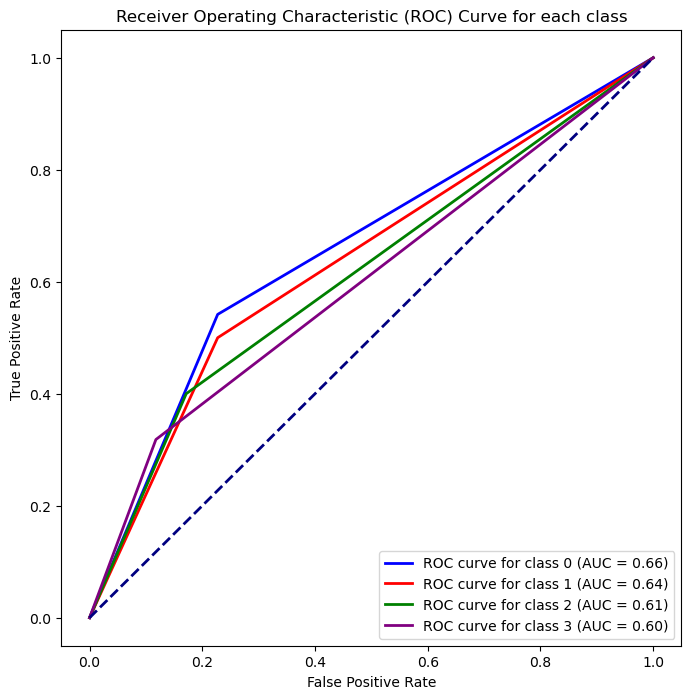

In [89]:
from sklearn.preprocessing import label_binarize

lb = LabelBinarizer()
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8, 8))
colors = ['blue', 'red', 'green', 'purple'] 

for i, color in zip(range(len(np.unique(y))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve for class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc='lower right')
plt.show()

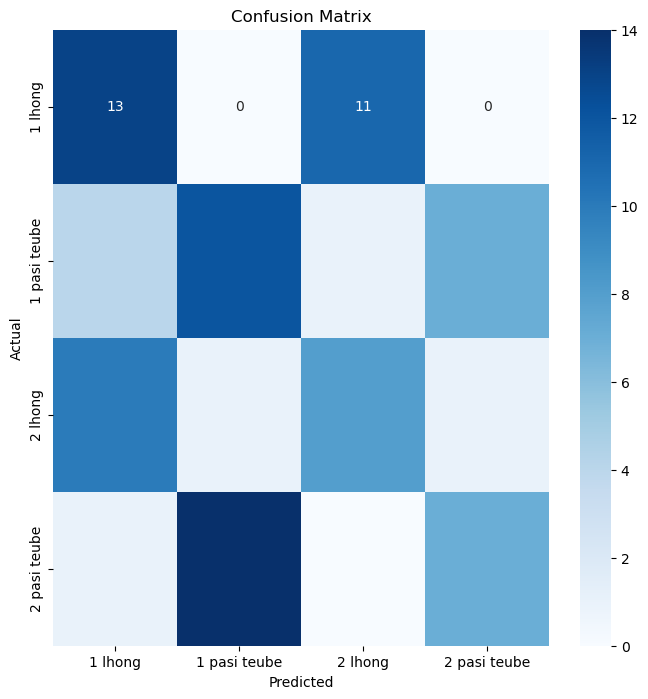

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()